### Deliverable 3: Optimizing Model

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import os
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
# Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("./Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN', 'NAME'], 1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Determine the number of unique values in each column.
application_col = application_df.dtypes.index.tolist()
application_df[application_col].nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df.APPLICATION_TYPE.value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

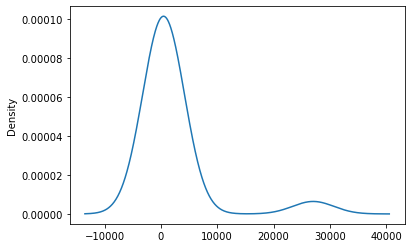

In [6]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [7]:
# Determine which values to replace if counts are less than 100
replace_application = list(application_counts[application_counts < 100].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app, "Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1900        1
C1245        1
C1236        1
C2500        1
C2561        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

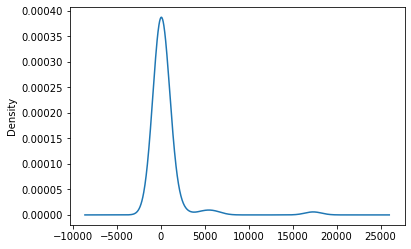

In [9]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [10]:
# Determine which values to replace if counts are less than ..?
replace_classification = list(classification_counts[classification_counts < 500].index)

# Replace in dataframe
for cls in replace_classification:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls, "Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [11]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [12]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,APPLICATION_TYPE_T9,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat, 1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"], 1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Updated Model with Changed Dataset (Different Binning)

In [16]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 368       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 419
Trainable params: 419
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [18]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 661us/step - loss: 0.6146 - accuracy: 0.6875
Epoch 2/100
804/804 [==============================] - 1s 636us/step - loss: 0.5682 - accuracy: 0.7233
Epoch 3/100
804/804 [==============================] - 1s 648us/step - loss: 0.5624 - accuracy: 0.7261
Epoch 4/100
804/804 [==============================] - 1s 675us/step - loss: 0.5596 - accuracy: 0.7261
Epoch 5/100
804/804 [==============================] - 0s 617us/step - loss: 0.5578 - accuracy: 0.7258
Epoch 6/100
804/804 [==============================] - 1s 627us/step - loss: 0.5548 - accuracy: 0.7266
Epoch 7/100
804/804 [==============================] - 1s 652us/step - loss: 0.5537 - accuracy: 0.7265
Epoch 8/100
804/804 [==============================] - 1s 658us/step - loss: 0.5530 - accuracy: 0.7266
Epoch 9/100
804/804 [==============================] - 1s 633us/step - loss: 0.5521 - accuracy: 0.7287
Epoch 10/100
804/804 [==============================] - 0s 608us/step - l

804/804 [==============================] - 1s 646us/step - loss: 0.5439 - accuracy: 0.7334
Epoch 80/100
804/804 [==============================] - 1s 667us/step - loss: 0.5435 - accuracy: 0.7339
Epoch 81/100
804/804 [==============================] - 1s 662us/step - loss: 0.5435 - accuracy: 0.7334
Epoch 82/100
804/804 [==============================] - 1s 643us/step - loss: 0.5436 - accuracy: 0.7333
Epoch 83/100
804/804 [==============================] - 1s 632us/step - loss: 0.5433 - accuracy: 0.7340
Epoch 84/100
804/804 [==============================] - 1s 659us/step - loss: 0.5440 - accuracy: 0.7332
Epoch 85/100
804/804 [==============================] - 0s 607us/step - loss: 0.5436 - accuracy: 0.7327
Epoch 86/100
804/804 [==============================] - 0s 606us/step - loss: 0.5434 - accuracy: 0.7337
Epoch 87/100
804/804 [==============================] - 1s 635us/step - loss: 0.5436 - accuracy: 0.7335
Epoch 88/100
804/804 [==============================] - 0s 603us/step - loss:

In [19]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5566 - accuracy: 0.7289
Loss: 0.5565521717071533, Accuracy: 0.728863000869751


### Updated Model with Additional Neurons & Layers

In [20]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  10
hidden_nodes_layer2 = 6
hidden_nodes_layer3 = 2

nn2 = tf.keras.models.Sequential()

# First hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                460       
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 66        
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 14        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 3         
Total params: 543
Trainable params: 543
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Compile the model
nn2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [22]:
# Train the model
fit_model2 = nn2.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 826us/step - loss: 0.6144 - accuracy: 0.6702
Epoch 2/100
804/804 [==============================] - 1s 801us/step - loss: 0.5614 - accuracy: 0.7261
Epoch 3/100
804/804 [==============================] - 1s 823us/step - loss: 0.5558 - accuracy: 0.7273
Epoch 4/100
804/804 [==============================] - 1s 846us/step - loss: 0.5539 - accuracy: 0.7272
Epoch 5/100
804/804 [==============================] - 1s 813us/step - loss: 0.5522 - accuracy: 0.7289
Epoch 6/100
804/804 [==============================] - 1s 833us/step - loss: 0.5520 - accuracy: 0.7284
Epoch 7/100
804/804 [==============================] - 1s 790us/step - loss: 0.5513 - accuracy: 0.7290
Epoch 8/100
804/804 [==============================] - 1s 824us/step - loss: 0.5505 - accuracy: 0.7296
Epoch 9/100
804/804 [==============================] - 1s 826us/step - loss: 0.5497 - accuracy: 0.7298
Epoch 10/100
804/804 [==============================] - 1s 836us/step - l

804/804 [==============================] - 1s 805us/step - loss: 0.5428 - accuracy: 0.7326
Epoch 80/100
804/804 [==============================] - 1s 798us/step - loss: 0.5431 - accuracy: 0.7338
Epoch 81/100
804/804 [==============================] - 1s 795us/step - loss: 0.5428 - accuracy: 0.7340
Epoch 82/100
804/804 [==============================] - 1s 813us/step - loss: 0.5427 - accuracy: 0.7339
Epoch 83/100
804/804 [==============================] - 1s 799us/step - loss: 0.5429 - accuracy: 0.7340
Epoch 84/100
804/804 [==============================] - 1s 822us/step - loss: 0.5428 - accuracy: 0.7349
Epoch 85/100
804/804 [==============================] - 1s 815us/step - loss: 0.5424 - accuracy: 0.7347
Epoch 86/100
804/804 [==============================] - 1s 814us/step - loss: 0.5427 - accuracy: 0.7339
Epoch 87/100
804/804 [==============================] - 1s 817us/step - loss: 0.5426 - accuracy: 0.7338
Epoch 88/100
804/804 [==============================] - 1s 804us/step - loss:

In [23]:
# Evaluate the model using the test data
model_loss2, model_accuracy2 = nn2.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss2}, Accuracy: {model_accuracy2}")

268/268 - 0s - loss: 0.5535 - accuracy: 0.7271
Loss: 0.5535375475883484, Accuracy: 0.7271137237548828


### Updated Model with Different Output Layer Activation Function

In [24]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  10
hidden_nodes_layer2 = 6
hidden_nodes_layer3 = 2

nn3 = tf.keras.models.Sequential()

# First hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn3.add(tf.keras.layers.Dense(units=1, activation="tanh"))

# Check the structure of the model
nn3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                460       
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 66        
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 14        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 3         
Total params: 543
Trainable params: 543
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Compile the model
nn3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [26]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints_optimization/", exist_ok=True)
checkpoint_path = "checkpoints_optimization/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
BATCH_SIZE = 32
STEPS_PER_EPOCH = y_train.size / BATCH_SIZE

cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=int(5*STEPS_PER_EPOCH))

In [27]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, batch_size = BATCH_SIZE, steps_per_epoch=STEPS_PER_EPOCH, callbacks=[cp_callback])

Epoch 1/100
803/803 [==============================] - 1s 668us/step - loss: 0.5427 - accuracy: 0.7338
Epoch 2/100
803/803 [==============================] - 1s 667us/step - loss: 0.5431 - accuracy: 0.7335
Epoch 3/100
803/803 [==============================] - 1s 678us/step - loss: 0.5428 - accuracy: 0.7338
Epoch 4/100
803/803 [==============================] - 1s 672us/step - loss: 0.5430 - accuracy: 0.7335
Epoch 5/100
763/803 [===========================>..] - ETA: 0s - loss: 0.5429 - accuracy: 0.7332
Epoch 00005: saving model to checkpoints/weights.05.hdf5
803/803 [==============================] - 1s 668us/step - loss: 0.5430 - accuracy: 0.7328
Epoch 6/100
803/803 [==============================] - 1s 661us/step - loss: 0.5431 - accuracy: 0.7341
Epoch 7/100
803/803 [==============================] - 1s 682us/step - loss: 0.5431 - accuracy: 0.7342
Epoch 8/100
803/803 [==============================] - 1s 851us/step - loss: 0.5429 - accuracy: 0.7331
Epoch 9/100
803/803 [=============

803/803 [==============================] - 1s 636us/step - loss: 0.5422 - accuracy: 0.7342
Epoch 64/100
803/803 [==============================] - 1s 738us/step - loss: 0.5421 - accuracy: 0.7344
Epoch 65/100
785/803 [============================>.] - ETA: 0s - loss: 0.5423 - accuracy: 0.7344
Epoch 00065: saving model to checkpoints/weights.65.hdf5
803/803 [==============================] - 1s 840us/step - loss: 0.5421 - accuracy: 0.7347
Epoch 66/100
803/803 [==============================] - 1s 736us/step - loss: 0.5423 - accuracy: 0.7344
Epoch 67/100
803/803 [==============================] - 1s 903us/step - loss: 0.5423 - accuracy: 0.7335
Epoch 68/100
803/803 [==============================] - 1s 680us/step - loss: 0.5419 - accuracy: 0.7338
Epoch 69/100
803/803 [==============================] - 1s 673us/step - loss: 0.5420 - accuracy: 0.7342
Epoch 70/100
736/803 [==========================>...] - ETA: 0s - loss: 0.5414 - accuracy: 0.7342
Epoch 00070: saving model to checkpoints/weig

In [28]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5566 - accuracy: 0.7290
Loss: 0.5566349029541016, Accuracy: 0.7289795875549316


In [29]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity.h5")

<AxesSubplot:>

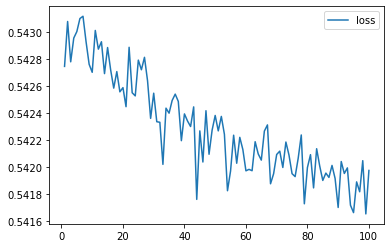

In [30]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history["loss"])+1))
# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

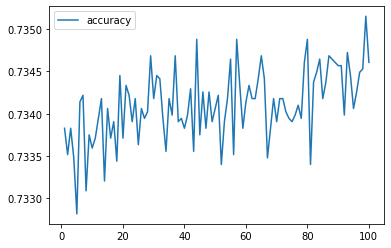

In [31]:
# Plot the accuracy
history_df.plot(y="accuracy")